In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
from math import sqrt
from IPython.display import display
from skimage import io, color

In [2]:
def sobel_edge_detection(input_image, edge_threshold=0.5):
    image = color.rgb2gray(input_image)
    width, height = image.shape

    sobel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    horizontal_gradient = convolve(image, sobel_horizontal)
    vertical_gradient = convolve(image, sobel_vertical)

    gradient_magnitude = np.sqrt(horizontal_gradient**2 + vertical_gradient**2)
    edge_pixels = (gradient_magnitude > edge_threshold) * 255
    new_image = Image.fromarray(edge_pixels.astype(np.uint8))
    return new_image

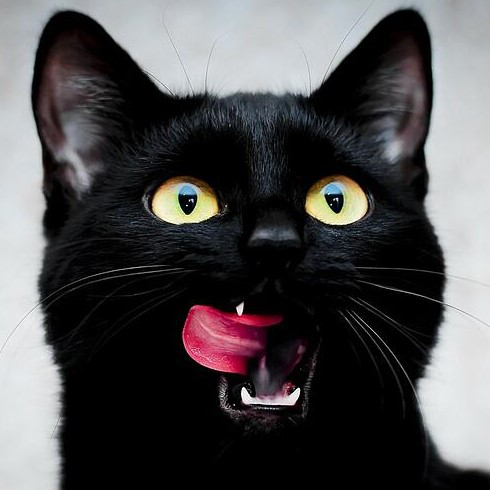

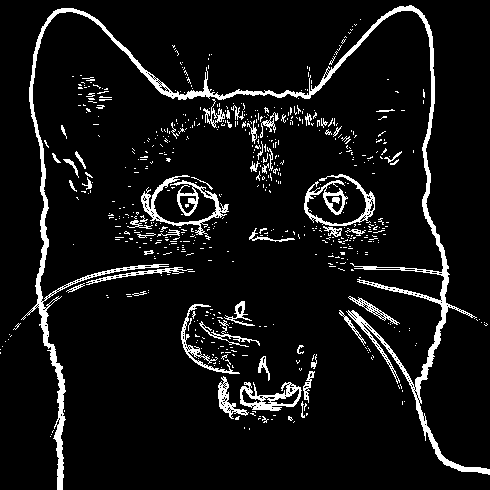

In [3]:
file = "kot.jpg"
image = Image.open(file)
display(image)

output_image = sobel_edge_detection(image)
display(output_image)

In [4]:
kernel_3x3_blur = np.array([[1, 2, 1],
                    [2, 4, 2],
                    [1, 2, 1]]) / 16.0

In [5]:
def gaussian_blur(image, kernel):
    img_array = np.array(image)
    
    blurred_array = convolution_2d(img_array, kernel)
    blurred_image = Image.fromarray(np.uint8(blurred_array))
    return blurred_image

def convolution_2d(image, kernel):
    height, width, channels = image.shape
    k_height, k_width = kernel.shape
    
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            for c in range(channels):
                result[i, j, c] = np.sum(image[i-1:i+2, j-1:j+2, c] * kernel)
                
    return result

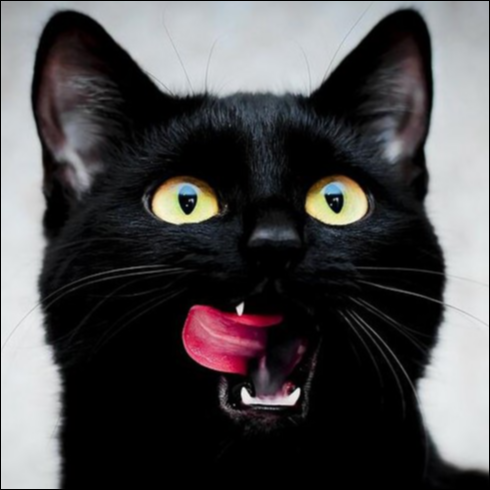

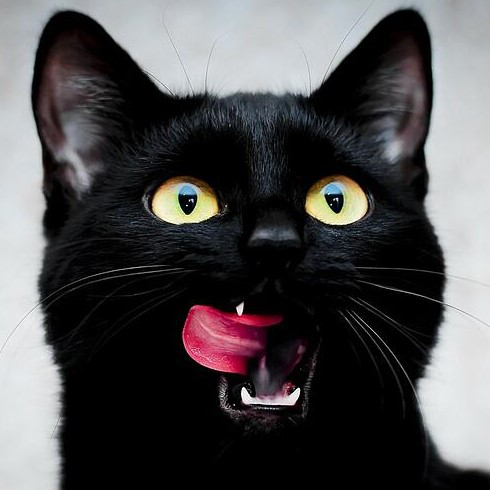

In [6]:
file = 'kot.jpg'
image = Image.open(file)
blurred_result = gaussian_blur(image,kernel_3x3_blur)
display(blurred_result)
display(image)

In [7]:
kernel_5x5_blur = np.array([[1, 4, 6, 4, 1],
                   [4, 16, 24, 16, 4],
                   [6, 24, 36, 24, 6],
                   [4, 16, 24, 16, 4],
                   [1, 4, 6, 4, 1]]) / 256.0

In [8]:
def gaussian_blur(image, kernel):
    img_array = np.array(image)
    
    blurred_array = convolution_2d(img_array, kernel)
    blurred_image = Image.fromarray(np.uint8(blurred_array))
    return blurred_image

def convolution_2d(image, kernel):
    height, width, channels = image.shape
    k_height, k_width = kernel.shape
    
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(2, height - 2):
        for j in range(2, width - 2):
            for c in range(channels):
                result[i, j, c] = np.sum(image[i-2:i+3, j-2:j+3, c] * kernel)
                
    return result

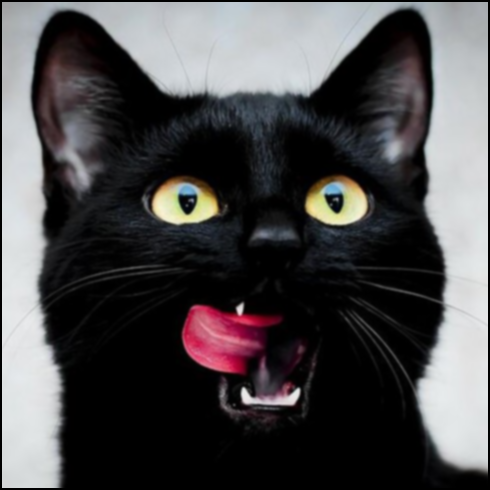

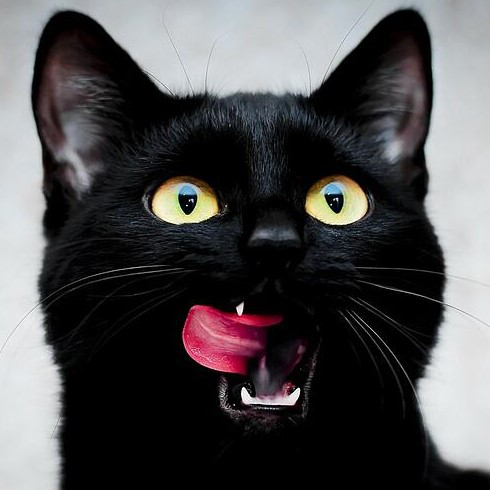

In [9]:
file = 'kot.jpg'
image = Image.open(file)
blurred_result = gaussian_blur(image,kernel_5x5_blur)
display(blurred_result)
display(image)

In [10]:
kernel_3x3_upsharp = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

In [11]:
def sharpening_function(image, kernel):
    img_array = np.array(image)
    
    upsharped_array = convolution_2d(img_array, kernel)
    normalized_array = (upsharped_array - np.min(upsharped_array)) / (np.max(upsharped_array) - np.min(upsharped_array)) * 255
    upsharped_image = Image.fromarray(np.uint8(normalized_array))
    return upsharped_image

def convolution_2d(image, kernel):
    height, width, channels = image.shape
    k_height, k_width = kernel.shape
    
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(2, height - 2):
        for j in range(2, width - 2):
            for c in range(channels):
                result[i, j, c] = np.sum(image[i-1:i+2, j-1:j+2, c] * kernel)
                
    return result

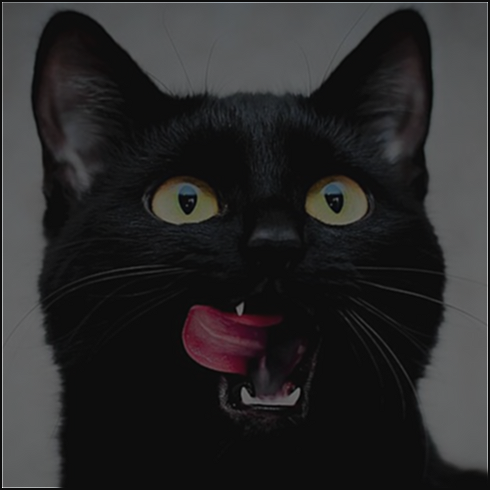

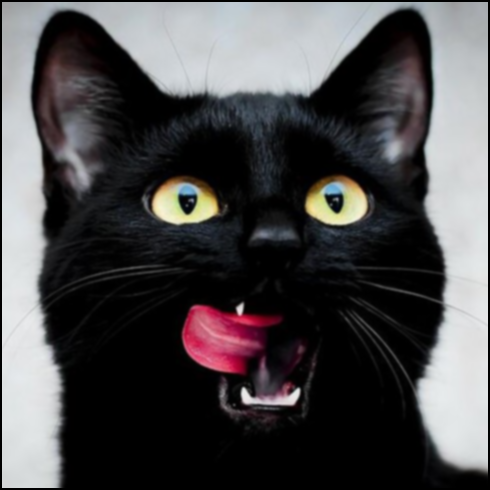

In [12]:
upsharped_result = sharpening_function(blurred_result,kernel_3x3_upsharp)
display(upsharped_result)
display(blurred_result)